# Association Rule Learning

Association rules are a method used to examine whether there are significant correlations between items that occur simultaneously and frequently, and to present the significant correlations determined through certain rules.

![](https://www.striped-giraffe.com/wp-content/uploads/2019/05/grocery-basket-analysis.jpg)

Association rules are used to reveal products that are related to each other and to determine the relationship between them. 

For example, if the relationships between the products are revealed in a market, the shelves can be arranged according to these rules. If we detect that the customer who buys product A tends to products B and C, we can place B and C products on nearby shelves. Campaigns and various sales strategies can be developed between product A and B.

Market basket analysis shows which product combinations are preferred most frequently in orders. It allows stores to better understand customer preferences and ultimately serve them better by predicting their customers' purchasing behavior. For example, a customer who buys bread is more likely to buy butter, while a customer who buys diapers is also more likely to buy products such as wet wipes and baby food.

Stores that successfully apply the market basket analysis can increase the amount of sales by positioning the products on the most suitable shelves and determining the discounts according to the results of this analysis.

# Apriori Algorithm

The name of the Apriori Algorithm means "prior" as it obtains the information from the previous step. Apriori Algorithm has been developed especially for data mining studies on very large-scale databases. It is an algorithm used in general association rule inference. The purpose of the algorithm is to reveal the connection between the rows in the databases.

The algorithm uses the bottom-up approach as a structure and examines one element at a time and tries to reveal the relationship between this element and the other candidates.

In addition, it is possible to liken the operation of the algorithm for each element to a search algorithm. In this sense, the algorithm is in the structure of Breadth-First Search.

Association Rules work on the basis of if/then statements. These statements help to reveal associations between independent data in a database, relational database or other information repositories. These rules are used to identify the relationships between the objects which are usually used together.

The two primary patterns that association rules use are support and confidence. The method finds similarities and rules formed by decomposing data for often used if/then patterns. Association rules are normally used to satisfy a user-specified minimum support and a use- specified minimum resolution simultaneously. There are various algorithms that are used to implement association rule learning.

![](https://derrickmartins.files.wordpress.com/2015/07/picture1.png)

# Support

Support is the frequency of A or how frequently an item appears in the dataset. It is defined as the fraction of the transaction T that contains the itemset X. If there are X datasets, then for transactions T, it can be written as:

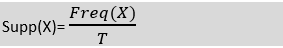

# Confidence

Confidence indicates how often the rule has been found to be true. Or how often the items X and Y occur together in the dataset when the occurrence of X is already given. It is the ratio of the transaction that contains X and Y to the number of records that contain X.

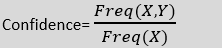

# Lift

It is the strength of any rule, which can be defined as below formula:

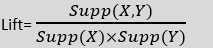

It is the ratio of the observed support measure and expected support if X and Y are independent of each other. 

If the lift value of two products is 1, it means that there is no relationship between these products. If the lift value is greater than 1, it means that these products are more likely to be purchased together.

# Apriori Algorithm Steps

Step-1: Determine the support of itemsets in the transactional database, and select the minimum support and confidence.

Step-2: Take all supports in the transaction with higher support value than the minimum or selected support value.

Step-3: Find all the rules of these subsets that have higher confidence value than the threshold or minimum confidence.

Step-4: Sort the rules as the decreasing order of lift.

# 1 - Preparing The Data Set

We will use Online Retail dataset and suggest products to users at the basket stage.

InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'C', it indicates a cancellation.

StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product.

Description: Product (item) name. Nominal.

Quantity: The quantities of each product (item) per transaction. Numeric.

InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated.

UnitPrice: Unit price. Numeric. Product price per unit in sterling (£).

Customer ID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer.

Country: Country name. Nominal. The name of the country where a customer resides.

The libraries I will use for Association Rules Analysis on Python are the main libraries: mlxtend, pandas and numpy

MLXTEND (Machine Learning Extensions)
In the MLXTEND module; classifier, cluster, regressor, evaluate, feature extraction&selection, frequent_patterns, general concepts, image, preprocessing, , math, plotting etc. extensions are included.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.width', 500)
# çıktının tek bir satırda olmasını sağlar.
pd.set_option('display.expand_frame_repr', False)
from mlxtend.frequent_patterns import apriori, association_rules

In [2]:
def load_onlineretail(path):
    df = pd.read_csv(path)
    return (df)

df = load_onlineretail("../input/online-retail-ii-uci/online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [3]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

def retail_data_prep(dataframe):
    dataframe.dropna(inplace=True)
    dataframe = dataframe[~dataframe["Invoice"].str.contains("C", na=False)]
    dataframe = dataframe[dataframe["Quantity"] > 0]
    dataframe = dataframe[dataframe["Price"] > 0]
    dataframe.drop(dataframe[dataframe["StockCode"] == "POST"].index, inplace=True)
    replace_with_thresholds(dataframe, "Quantity")
    replace_with_thresholds(dataframe, "Price")
    return dataframe

df = retail_data_prep(df)

df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12.0,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12.0,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48.0,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24.0,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


While choosing the algorithm, the algorithm with the highest performance is preferred depending on the most important factor data type. Among the algorithms developed for association rules analysis, Apriori and FP-Growth algorithms are generally preferred in studies.

Association algorithms used to create rules are divided into 2 main groups as **sequential** and **parallel**.

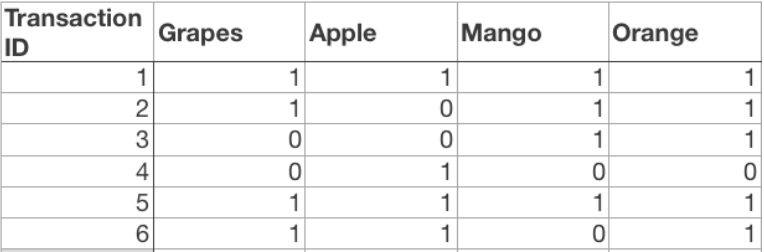

In order to find out interesting rules out of multiple possible rules from this small business scenario, we will be using the following matrices:

 
**1. Support: Its the default popularity of an item. In mathematical terms, the support of item A is nothing but the ratio of transactions involving A to the total number of transactions.**

Support(Grapes) = (Transactions involving Grapes)/(Total transaction)

Support(Grapes) = 0.666

 
**2. Confidence: Likelihood that customer who bought both A and B. Its divides the number of transactions involving both A and B by the number of transactions involving B.**

Confidence(A => B) = (Transactions involving both A and B)/(Transactions involving only A)

Confidence({Grapes, Apple} => {Mango}) = Support(Grapes, Apple, Mango)/Support(Grapes, Apple)

= 2/6 / 3/6

= 0.667

 
**3. Lift : Increase in the sale of A when you sell B.**

Lift(A => B) = Confidence(A, B) / Support(B)

Lift ({Grapes, Apple} => {Mango}) = 1

So, likelihood of a customer buying both A and B together is ‘lift-value’ times more than the chance if purchasing alone.

Lift (A => B) = 1 means that there is no correlation within the itemset.
Lift (A => B) > 1 means that there is a positive correlation within the itemset, i.e., products in the itemset, A, and B, are more likely to be bought together.
Lift (A => B) < 1 means that there is a negative correlation within the itemset, i.e., products in itemset, A, and B, are unlikely to be bought together.
 
Association Rule-based algorithms are viewed as a two-step approach:

**Frequent Itemset Generation:** Find all frequent item-sets with support >= pre-determined min_support count


**Rule Generation:** List all Association Rules from frequent item-sets. Calculate Support and Confidence for all rules. Prune rules that fail min_support and min_confidence thresholds. 
[1]

# 2 - Apriori Coding

Let's select the transactions whose country field is Germany and prepare a model that will be specific to them.

In [4]:
df_gr = df[df['Country'] == "Germany"]

To create the Invoice Product Matrix, we first create the lines. Invoices are our baskets. We group the the previous baskets according to Invoice and then group by according to the description. In this way, we get the sum of the quantities in the invoices with the sum method, we also bring the information of how many of the relevant products are in a basket.

In [5]:
df_gr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).head(20)

Quantity
Invoice Description                                
489526  6 RIBBONS RUSTIC CHARM                 12.0
        ANTIQUE SILVER TEA GLASS ETCHED        12.0
        BIRD DECORATION RED SPOT               24.0
        BLUE/BROWN DOTS RUFFLED UMBRELLA        3.0
        EDWARDIAN PARASOL BLACK                 6.0
        EDWARDIAN PARASOL NATURAL               6.0
        FELT TOADSTOOL  SMALL                  12.0
        FELT TOADSTOOL LARGE                   12.0
        HAIRCLIPS FORTIES FABRIC ASSORTED      24.0
        JIGSAW TOADSTOOLS 3 PIECE               8.0
        KIDS RAIN MAC BLUE                     24.0
        KIDS RAIN MAC PINK                     24.0
        PACK OF 60 MUSHROOM CAKE CASES         24.0
        POLYESTER FILLER PAD 40x40cm            2.0
        POLYESTER FILLER PAD 60x40cm            3.0
        RED HANGING HEART T-LIGHT HOLDER        6.0
        RED SPOTS  WRAP                        25.0
        RED SPOTTY BOWL                         8.0
        RED SPOTTY CHILDS UMBRELLA              6.0
        RED SPOTTY CUP                         16.0

However, the *Apriori Algorithm* wants the pivoted version of this table as input. To get the matrix we need, we need to take the pivot of it. We do that with the help of unstack method. Thus, we bring NAN expression for products that are not in the baskets but if there are, we bring the information of how many pieces are there.

# 2.1 - Invoice Product Matrix

In [6]:
df_gr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().iloc[0:5, 0:5]

Quantity                                                                                                     
Description  3 STRIPEY MICE FELTCRAFT  50'S CHRISTMAS GIFT BAG LARGE  CHERRY BLOSSOM  DECORATIVE FLASK  DOLLY GIRL BEAKER  FLAMINGO LIGHTS
Invoice                                                                                                                                   
489526                            NaN                            NaN                               NaN                NaN              NaN
490395                            NaN                            NaN                               NaN                NaN              NaN
490563                            NaN                            NaN                               NaN                NaN              NaN
490564                            6.0                            NaN                               NaN                NaN              NaN
490682                            NaN                            NaN                               NaN                NaN              NaN

I use fillna method to write zero in cells that seem as NAN

In [7]:
df_gr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).iloc[0:5, 0:5]

Quantity                                                                                                     
Description  3 STRIPEY MICE FELTCRAFT  50'S CHRISTMAS GIFT BAG LARGE  CHERRY BLOSSOM  DECORATIVE FLASK  DOLLY GIRL BEAKER  FLAMINGO LIGHTS
Invoice                                                                                                                                   
489526                            0.0                            0.0                               0.0                0.0              0.0
490395                            0.0                            0.0                               0.0                0.0              0.0
490563                            0.0                            0.0                               0.0                0.0              0.0
490564                            6.0                            0.0                               0.0                0.0              0.0
490682                            0.0                            0.0                               0.0                0.0              0.0

Now we have a nice table so that we can observe the baskets. However, how many of that product is in a basket is not our concern in this algorithm, so if there is one of that product in the basket, it will be enough for us to write 1. We are navigating all the cells with the applymap function. If it is greater than 0, we write 1, otherwise we say 0.

In [8]:
df_gr.groupby(['Invoice', 'Description']).agg({"Quantity": "sum"}).unstack().fillna(0).applymap(
    lambda x: 1 if x > 0 else 0).iloc[0:5, 0:5]

Quantity                                                                                                     
Description  3 STRIPEY MICE FELTCRAFT  50'S CHRISTMAS GIFT BAG LARGE  CHERRY BLOSSOM  DECORATIVE FLASK  DOLLY GIRL BEAKER  FLAMINGO LIGHTS
Invoice                                                                                                                                   
489526                              0                              0                                 0                  0                0
490395                              0                              0                                 0                  0                0
490563                              0                              0                                 0                  0                0
490564                              1                              0                                 0                  0                0
490682                              0                              0                                 0                  0                0

We have created the matrix we need, but we do not need long product names here. Instead, we need to write a function that will convert the Stock Code (ID) to the product name whenever we want them.

For this, first let's define a simple function that will check the IDs, when we enter the id we are interested in, it will bring us the product description.

In [9]:
def check_id(dataframe, stock_code):
    product_name = dataframe[dataframe["StockCode"] == stock_code][["Description"]].values[0].tolist()
    print(product_name)


check_id(dataframe=df_gr, stock_code="15036")

['ASSORTED COLOURS SILK FAN']


We created the **Invoice Product Matrix**, in other words the **Market Product Matrix.**

In [10]:
def create_invoice_product_df(dataframe, id=False):
    if id:
        return dataframe.groupby(['Invoice', "StockCode"])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)
    else:
        return dataframe.groupby(['Invoice', 'Description'])['Quantity'].sum().unstack().fillna(0). \
            applymap(lambda x: 1 if x > 0 else 0)

gr_inv_pro_df = create_invoice_product_df(df_gr, id=True)

gr_inv_pro_df.head()

StockCode  10002  10125  10135  11001  15034  15036  15039  15044A  15044B  15044D  15056BL  15056N  15056P  15058A  15058B  15058C  15060B  16008  16011  16012  16014  16016  16033  16045  16052  16054  16156L  16156S  16161G  16161P  16161U  16168M  16169C  16169E  16169F  16169K  16169M  16169N  16169P  16218  16235  16236  16237  16238  16256B  16258A  16259  17003  17091A  17109D  20617  20619  20622  20652  20653  20654  20658  20661  20665  20668  20671  20672  20674  20675  20676  20677  20679  20681  20682  20684  20685  20689  20692  20696  20702  20703  20704  20705  20707  20711  20712  20713  20716  20717  20718  20719  20723  20724  20725  20726  20727  20728  20729  20730  20734  20738  20749  20750  20751  20752  20754  20755  20756  20758  20759  20760  20761  20762  20764  20766  20767  20768  20769  20770  20771  20772  20774  20794  20796  20798  20799  20816  20828  20829  20846  20857  20864  20866  20867  20868  20871  20886  20897  20902  20903  20914  20957  20961  20963  20964  20966  20967  20971  20972  20973  20974  20975  20977  20978  20979  20981  20982  20983  20984  20985  20990  20992  20997  20998  21000  21001  21002  21011  21014  21015  21025  21026  21027  21033  21034  21035  21039  21041  21042  21051  21054  21055  21056  21058  21059  21061  21062  21064  21067  21068  21069  21070  21077  21078  21080  21082  21084  21085  21086  21088  21090  21091  21092  21094  21096  21098  21099  21100  21106  21108  21110  21114  21115  21116  21117  21121  21122  21123  21124  21125  21126  21127  21128  21130  21135  21136  21137  21144  21153  21154  21155  21156  21157  21158  21159  21162  21163  21164  21165  21166  21169  21175  21179  21186  21188  21190  21191  21194  21196  21197  21202  21203  21204  21205  21206  21207  21208  21209  21210  21211  21212  21213  21215  21216  21217  21218  21219  21220  21221  21222  21223  21224  21226  21231  21232  21238  21239  21240  21241  21242  21243  21244  21245  21246  21247  21248  21249  21250  21251  21257  21258  21259  21260  21262  21263  21264  21269  21270  21272  21275  21276  21277  21278  21281  21282  21284  21285  21286  21289  21291  21292  21293  21307  21311  21314  21318  21319  21320  21324  21327  21328  21329  21330  21340  21348  21354  21355  21357  21358  21360  21361  21371  21374  21380  21381  21383  21389  21392  21393  21394  21395  21396  21397  21398  21399  21401  21402  21403  21408  21410  21411  21414  21415  21416  21424  21426  21427  21428  21429  21430  21431  21432  21439  21440  21441  21445  21446  21447  21452  21456  21458  21461  21462  21464  21467  21471  21472  21474  21479  21481  21482  21484  21485  21486  21488  21491  21494  21495  21497  21498  21499  21500  21503  21504  21506  21507  21508  21509  21519  21523  21524  21525  21527  21528  21529  21531  21533  21534  21535  21537  21539  21541  21542  21544  21555  21556  21558  21559  21561  21562  21563  21564  21576  21577  21578  21579  21580  21581  21586  21588  21590  21592  21609  21610  21611  21612  21614  21615  21618  21619  21620  21621  21622  21623  21624  21625  21628  21637  21640  21642  21645  21648  21650  21651  21652  21653  21655  21656  21658  21661  21662  21666  21667  21668  21669  21670  21671  21672  21673  21674  21675  21679  21680  21682  21683  21687  21690  21691  21693  21696  21697  21698  21700  21703  21704  21705  21706  21707  21708  21709  21710  21714  21715  21716  21717  21718  21719  21720  21721  21722  21723  21724  21725  21730  21731  21733  21735  21739  21741  21742  21746  21747  21749  21752  21754  21755  21756  21763  21768  21770  21773  21774  21775  21785  21786  21787  21788  21789  21790  21791  21801  21802  21803  21809  21811  21817  21826  21827  21828  21829  21830  21832  21833  21836  21837  21842  21843  21844  21845  21866  21870  21871  21872  21873  21874  21875  21877  21878  21880  21881  21882  21883  21884  21889  21890  21891  21892  21894  21896  21899  21903 

# 3 - Setting of Association Rules

We will calculate the probabilities of association of all possible products with a priori, with a minimum support value of 0.01. Normally, in real life, these support values are expected to be very low like here. Since this data set is a real data set, it is very normal for it to be so small.

In [11]:
frequent_itemsets = apriori(gr_inv_pro_df, min_support=0.01, use_colnames=True)

We list the support values we bring in descending order. All possible product pairs in the dataset will be included in this matrix.

In [12]:
frequent_itemsets.sort_values("support", ascending=False).head(5)

,support,itemsets
251,0.271895,(22326)
253,0.177778,(22328)
27,0.171242,(20719)
2297,0.142484,"(22326, 22328)"
317,0.139869,(22554)


# 3.1 - Interpretation of Association Rules

1. Antecendents: Item in basket

2. Consequents: Product to be recommended in accordance with the antecendents.

3. Antecendents Support: Support value for only the item in the basket.

4. Consequents Support: Support value for only the the recommended product.

5. Support: Probability that the product in the basket and the product to be recommended will appear in the basket together

6. Confidence: Probability of buying the recommended product when the product in the cart is purchased

7. Lift: Shows how many times the probability of buying the product to be recommended increases when the product in the basket is purchased.

We assigned the association rule, which we gave the minimum threshold to ourselves, to the variable named frequent_itemset. We sort the frequent_itemset matrix we obtained according to the support metric.

Below is a probability value for all possible combinations. For example, the support value of the product numbered 22326 is 0.263625, the support value alone for the product numbered 22328 is 0.177778, and the probability of both being in a basket is the value of 0.142484 in the support column.



When 22326 is purchased, the probability of obtaining 22328, that is, the '*confidence*' value, is calculated as 0.52403, and when 22326 is purchased, the probability of buying 22328 increases by 2.94 times (*lift*). *Lift* and *leverage* refer to similar situations. However, we will focus only on *lift*, as *Leverage* has a greater leverage effect for those with higher support, thus causing bias. *Conviction* is the expected frequency for antecedents without consequents.


In [13]:
rules = association_rules(frequent_itemsets, metric="support", min_threshold=0.01)
rules.sort_values("support", ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3470,(22326),(22328),0.271895,0.177778,0.142484,0.524038,2.947716,0.094147,1.727497
3471,(22328),(22326),0.177778,0.271895,0.142484,0.801471,2.947716,0.094147,3.667490
611,(22326),(20719),0.271895,0.171242,0.086275,0.317308,1.852980,0.039715,1.213956
610,(20719),(22326),0.171242,0.271895,0.086275,0.503817,1.852980,0.039715,1.467411
3537,(22326),(22554),0.271895,0.139869,0.074510,0.274038,1.959247,0.036480,1.184816


In [14]:
#Lets observe the relatinship between the product number 20719 and 22326 


check_id(dataframe=df_gr, stock_code="20719")
check_id(dataframe=df_gr, stock_code="22326")

['WOODLAND CHARLOTTE BAG']
['ROUND SNACK BOXES ,SET4, WOODLAND ']


Probability of only WOODLAND CHARLOTTE BAG appearing in the whole basket = 0.171242

Probability of showing only ROUND SNACK BOXES ,SET4, WOODLAND in the whole basket = 0.271895

Probability of WOODLAND CHARLOTTE BAG and ROUND SNACK BOXES ,SET4, WOODLAND appearing in the whole basket = 0.086275

Probability of getting ROUND SNACK BOXES ,SET4, WOODLAND when WOODLAND CHARLOTTE BAG is purchased = 0.503817

We observe that when WOODLAND CHARLOTTE BAG is purchased, the probability of getting ROUND SNACK BOXES ,SET4, WOODLAND increases 1.852980 times.

In [15]:
rules.sort_values("lift", ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38565,"(21244, 20674, 21242)","(20676, 21238, 21245, 20675)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
38525,"(21244, 21238, 20674, 21242)","(20676, 21245, 20675)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
38536,"(20676, 21238, 21245, 20675)","(21244, 20674, 21242)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
4196,(22562),(22563),0.010458,0.011765,0.010458,1.000000,85.0,0.010334,inf
38576,"(20676, 21245, 20675)","(21244, 21238, 20674, 21242)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
32320,"(20676, 21245, 20675)","(21244, 20674, 21242)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
32317,"(21244, 20674, 21242)","(20676, 21245, 20675)",0.011765,0.011765,0.011765,1.000000,85.0,0.011626,inf
4197,(22563),(22562),0.011765,0.010458,0.010458,0.888889,85.0,0.010334,8.905882
30735,"(21239, 84997C)","(84997D, 21240, 20677)",0.013072,0.011765,0.011765,0.900000,76.5,0.011611,9.882353
38557,"(21244, 20676, 21245)","(21242, 21238, 20674, 20675)",0.013072,0.011765,0.011765,0.900000,76.5,0.011611,9.882353


For example, the purchase of 21242 and 21244, 20674 triples increases the probability of purchasing the other 4 products 85 times.

In [16]:
check_id(dataframe=df_gr, stock_code="21242")
check_id(dataframe=df_gr, stock_code="21244")
check_id(dataframe=df_gr, stock_code="20674")

['RED SPOTTY PLATE ']
['BLUE  SPOTTY PLATE ']
['GREEN SPOTTY BOWL']


In [17]:
check_id(dataframe=df_gr, stock_code="20676")
check_id(dataframe=df_gr, stock_code="21245")
check_id(dataframe=df_gr, stock_code="21238")
check_id(dataframe=df_gr, stock_code="20675")

['RED SPOTTY BOWL']
['GREEN  SPOTTY PLATE ']
['RED SPOTTY CUP']
['BLUE SPOTTY BOWL']


# 4 - Suggesting a Product to Users at the Basket Stage

For example, if the customer has the following product in his shopping cart

In [18]:
# StockID: 22492

product_id = "22492"
check_id(df_gr, product_id)

['MINI PAINT SET VINTAGE ']


We aim to recommend these products to this customer, whatever the products that are most purchased and added to the cart with this product.


In [19]:
sorted_rules = rules.sort_values("lift", ascending=False)

The product we will recommend to our user who buys the above product will be as follows. We look at the antecedent column, which shows the products purchased. indexes are also i.

In [20]:
recommendation_list = []

for i, product in enumerate(sorted_rules["antecedents"]):
    for j in list(product):
        if j == product_id:
            recommendation_list.append(list(sorted_rules.iloc[i]["consequents"])[0])

recommendation_list[0:3]

['22328', '22556', '22328']

In [21]:
check_id(df_gr, '22328')

check_id(df_gr, '22556')

check_id(df_gr, '22328')

['ROUND SNACK BOXES ,SET 4, FRUITS ']
['PLASTERS IN TIN CIRCUS PARADE ']
['ROUND SNACK BOXES ,SET 4, FRUITS ']


The functionalized version of the recommendation operation will be as follows:

In [22]:
def arl_recommender(rules_df, product_id, rec_count=1):

    sorted_rules = rules_df.sort_values("lift", ascending=False)

    recommendation_list = []

    for i, product in sorted_rules["antecedents"].items():
        for j in list(product):
            if j == product_id:
                recommendation_list.append(list(sorted_rules.iloc[i]["consequents"]))

    recommendation_list = list({item for item_list in recommendation_list for item in item_list})

    return recommendation_list[:rec_count]

# REFERENCES

[1] https://www.kdnuggets.com/2019/12/market-basket-analysis.html

[2] Mueller, A. (1998). Fast sequential and parallel algorithms for association rule mining: A comparison.

[3] Kumbhare, T. A., & Chobe, S. V. (2014). An overview of association rule mining algorithms. International Journal of Computer Science and Information Technologies, 5(1), 927-930.

[4] Yadav, C., Wang, S., & Kumar, M. (2013, July). An approach to improve apriori algorithm based on association rule mining. In 2013 Fourth International Conference on Computing, Communications and Networking Technologies (ICCCNT) (pp. 1-9). IEEE.